<a href="https://colab.research.google.com/github/divyansh1195/Machine-Learning-/blob/master/Housing%20Price%20Prediction/housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Price Prediction (Kaggle Competition) 
## In this notebook, I have made an attempt to predict the Housing Prices with the help of various ML Regression techniques and my best score which I achieved for this competition was 0.127. 

# Importing the libraries and the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv(r'C:\Users\Divyansh Mathur\Desktop\ML\Housing\train.csv')
test=pd.read_csv(r'C:\Users\Divyansh Mathur\Desktop\ML\Housing\test.csv')

# NAN values in training and test dataset

In [ ]:
#percentage of nan values present in each feature
features_nan=[feature for feature in train.columns if train[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, np.round(train[feature].isnull().mean()*100, 2),  ' % missing values')

LotFrontage 17.74  % missing values
Alley 93.77  % missing values
MasVnrType 0.55  % missing values
MasVnrArea 0.55  % missing values
BsmtQual 2.53  % missing values
BsmtCond 2.53  % missing values
BsmtExposure 2.6  % missing values
BsmtFinType1 2.53  % missing values
BsmtFinType2 2.6  % missing values
Electrical 0.07  % missing values
FireplaceQu 47.26  % missing values
GarageType 5.55  % missing values
GarageYrBlt 5.55  % missing values
GarageFinish 5.55  % missing values
GarageQual 5.55  % missing values
GarageCond 5.55  % missing values
PoolQC 99.52  % missing values
Fence 80.75  % missing values
MiscFeature 96.3  % missing values


In [ ]:
#percentage of nan values present in each feature
features_nan=[feature for feature in test.columns if test[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, np.round(test[feature].isnull().mean()*100, 2),  ' % missing values')

MSZoning 0.27  % missing values
LotFrontage 15.56  % missing values
Alley 92.67  % missing values
Utilities 0.14  % missing values
Exterior1st 0.07  % missing values
Exterior2nd 0.07  % missing values
MasVnrType 1.1  % missing values
MasVnrArea 1.03  % missing values
BsmtQual 3.02  % missing values
BsmtCond 3.08  % missing values
BsmtExposure 3.02  % missing values
BsmtFinType1 2.88  % missing values
BsmtFinSF1 0.07  % missing values
BsmtFinType2 2.88  % missing values
BsmtFinSF2 0.07  % missing values
BsmtUnfSF 0.07  % missing values
TotalBsmtSF 0.07  % missing values
BsmtFullBath 0.14  % missing values
BsmtHalfBath 0.14  % missing values
KitchenQual 0.07  % missing values
Functional 0.14  % missing values
FireplaceQu 50.03  % missing values
GarageType 5.21  % missing values
GarageYrBlt 5.35  % missing values
GarageFinish 5.35  % missing values
GarageCars 0.07  % missing values
GarageArea 0.07  % missing values
GarageQual 5.35  % missing values
GarageCond 5.35  % missing values
PoolQC

# Normal Distribution

# Log transform skewed numeric features

In [ ]:
# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

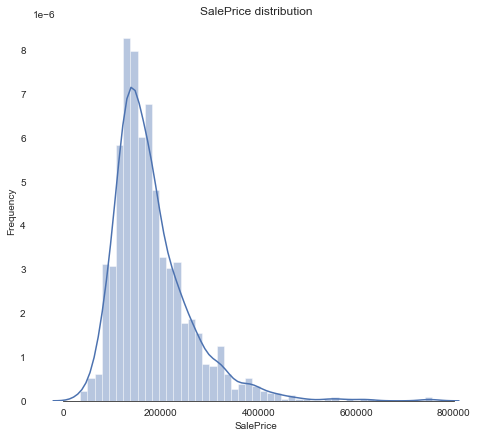

In [ ]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

The SalePrice is skewed to the right. This is a problem because most ML models don't do well with non-normally distributed data. We can apply a log(1+x) tranform to fix the skewness.

We want our skewness value to be around 0 and kurtosis less than 3.

In [ ]:
# Skew and kurt
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [ ]:
# log(1+x) transform
train["SalePrice"] = np.log1p(train["SalePrice"])


 mu = 12.02 and sigma = 0.40



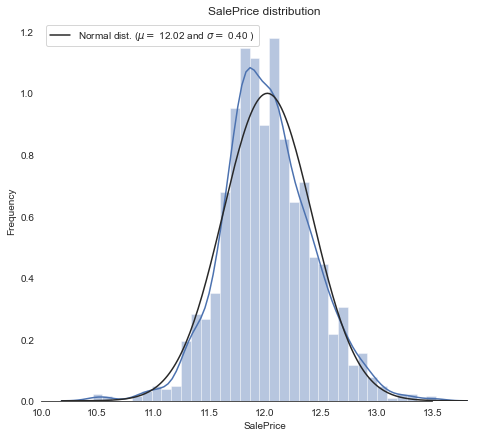

In [ ]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

In [ ]:
# Skew and kurt
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 0.121347
Kurtosis: 0.809519


# Combine both train and test dataset

In [ ]:
'''# Split features and labels
train_labels = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test'''

"# Split features and labels\ntrain_labels = train['SalePrice'].reset_index(drop=True)\ntrain_features = train.drop(['SalePrice'], axis=1)\ntest_features = test"

In [ ]:
#train_labels

In [ ]:
df = pd.concat([train, test], sort=True).reset_index(drop=True)
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [ ]:
df.shape

(2919, 81)

In [ ]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


# Taking care of missing values in the dataset

In [ ]:
#percentage of nan values present in each feature
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>0]

for feature in features_nan:
    print(feature, np.round(df[feature].isnull().mean()*100, 2),  ' % missing values')

Alley 93.22  % missing values
BsmtCond 2.81  % missing values
BsmtExposure 2.81  % missing values
BsmtFinSF1 0.03  % missing values
BsmtFinSF2 0.03  % missing values
BsmtFinType1 2.71  % missing values
BsmtFinType2 2.74  % missing values
BsmtFullBath 0.07  % missing values
BsmtHalfBath 0.07  % missing values
BsmtQual 2.77  % missing values
BsmtUnfSF 0.03  % missing values
Electrical 0.03  % missing values
Exterior1st 0.03  % missing values
Exterior2nd 0.03  % missing values
Fence 80.44  % missing values
FireplaceQu 48.65  % missing values
Functional 0.07  % missing values
GarageArea 0.03  % missing values
GarageCars 0.03  % missing values
GarageCond 5.45  % missing values
GarageFinish 5.45  % missing values
GarageQual 5.45  % missing values
GarageType 5.38  % missing values
GarageYrBlt 5.45  % missing values
KitchenQual 0.03  % missing values
LotFrontage 16.65  % missing values
MSZoning 0.14  % missing values
MasVnrArea 0.79  % missing values
MasVnrType 0.82  % missing values
MiscFeatu

# 1.Numerical features

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
#'O' stands for object

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  38


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,7,0,12.247699,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,6,0,12.109016,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,7,0,12.317171,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,7,0,11.849405,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,8,0,12.429220,0,9,1145.0,192,2000,2000,2008


In [ ]:
num=df[numerical_features]
num.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,7,0,12.247699,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,6,0,12.109016,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,7,0,12.317171,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,7,0,11.849405,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,8,0,12.429220,0,9,1145.0,192,2000,2000,2008


In [ ]:
num.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [ ]:
#percentage of nan values present in each feature
numerical_nan=[feature for feature in num.columns if num[feature].isnull().sum()>0]

for feature in numerical_nan:
    print(feature, np.round(num[feature].isnull().mean()*100, 2),  ' % missing values')

BsmtFinSF1 0.03  % missing values
BsmtFinSF2 0.03  % missing values
BsmtFullBath 0.07  % missing values
BsmtHalfBath 0.07  % missing values
BsmtUnfSF 0.03  % missing values
GarageArea 0.03  % missing values
GarageCars 0.03  % missing values
GarageYrBlt 5.45  % missing values
LotFrontage 16.65  % missing values
MasVnrArea 0.79  % missing values
SalePrice 49.98  % missing values
TotalBsmtSF 0.03  % missing values


In [ ]:
df[numerical_nan]

,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,GarageArea,GarageCars,GarageYrBlt,LotFrontage,MasVnrArea,SalePrice,TotalBsmtSF
0,706.0,0.0,1.0,0.0,150.0,548.0,2.0,2003.0,65.0,196.0,12.247699,856.0
1,978.0,0.0,0.0,1.0,284.0,460.0,2.0,1976.0,80.0,0.0,12.109016,1262.0
2,486.0,0.0,1.0,0.0,434.0,608.0,2.0,2001.0,68.0,162.0,12.317171,920.0
3,216.0,0.0,1.0,0.0,540.0,642.0,3.0,1998.0,60.0,0.0,11.849405,756.0
4,655.0,0.0,1.0,0.0,490.0,836.0,3.0,2000.0,84.0,350.0,12.429220,1145.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,0.0,0.0,0.0,546.0,0.0,0.0,NaN,21.0,0.0,NaN,546.0
2915,252.0,0.0,0.0,0.0,294.0,286.0,1.0,1970.0,21.0,0.0,NaN,546.0
2916,1224.0,0.0,1.0,0.0,0.0,576.0,2.0,1960.0,160.0,0.0,NaN,1224.0
2917,337.0,0.0,0.0,1.0,575.0,0.0,0.0,NaN,62.0,0.0,NaN,912.0


1. MasVnrArea

In [ ]:
df['MasVnrArea'].isnull().sum()

23

In [ ]:
mva_corr=df.corr().abs().unstack().sort_values(ascending=False).reset_index()
mva_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
mva_corr[mva_corr['Feature 1'] == 'MasVnrArea']

,Feature 1,Feature 2,Correlation Coefficient
5,MasVnrArea,MasVnrArea,1.000000
156,MasVnrArea,OverallQual,0.432947
159,MasVnrArea,SalePrice,0.430809
172,MasVnrArea,GrLivArea,0.402994
179,MasVnrArea,TotalBsmtSF,0.397240
180,MasVnrArea,1stFlrSF,0.395834
195,MasVnrArea,GarageArea,0.374061
202,MasVnrArea,GarageCars,0.361190
245,MasVnrArea,YearBuilt,0.314051
258,MasVnrArea,BsmtFinSF1,0.303490


In [ ]:
df['MasVnrArea'] = df.groupby(['OverallQual'])['MasVnrArea'].apply(lambda x: x.fillna(x.median()))

In [ ]:
df["MasVnrArea"].isnull().sum()

0

2. GarageYrBlt

In [ ]:
df["GarageYrBlt"].isnull().sum()

159

In [ ]:
gyrblt_corr=df.corr().abs().unstack().sort_values(ascending=False).reset_index()
gyrblt_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
gyrblt_corr[gyrblt_corr['Feature 1'] == 'GarageYrBlt']

,Feature 1,Feature 2,Correlation Coefficient
34,GarageYrBlt,GarageYrBlt,1.000000
40,GarageYrBlt,YearBuilt,0.834812
57,GarageYrBlt,YearRemodAdd,0.652365
79,GarageYrBlt,GarageCars,0.587712
86,GarageYrBlt,OverallQual,0.571803
96,GarageYrBlt,GarageArea,0.555836
101,GarageYrBlt,SalePrice,0.541073
117,GarageYrBlt,FullBath,0.495688
216,GarageYrBlt,TotalBsmtSF,0.348408
233,GarageYrBlt,OverallCond,0.325849


In [ ]:
df['GarageYrBlt'] = df.groupby(['YearBuilt'])['GarageYrBlt'].apply(lambda x: x.fillna(x.median()))

C:\Users\Divyansh Mathur\anaconda3\envs\Tensorflow\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
df["GarageYrBlt"].isnull().sum()

5

In [ ]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

3.LotFrontage

In [ ]:
df["LotFrontage"].isnull().sum()

486

In [ ]:
lf_corr=df.corr().abs().unstack().sort_values(ascending=False).reset_index()
lf_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
lf_corr[lf_corr['Feature 1'] == 'LotFrontage']

,Feature 1,Feature 2,Correlation Coefficient
2,LotFrontage,LotFrontage,1.000000
120,LotFrontage,LotArea,0.489896
142,LotFrontage,1stFlrSF,0.458247
163,LotFrontage,MSSubClass,0.417359
188,LotFrontage,GrLivArea,0.382462
207,LotFrontage,GarageArea,0.359786
213,LotFrontage,SalePrice,0.355879
214,LotFrontage,TotalBsmtSF,0.354822
216,LotFrontage,TotRmsAbvGrd,0.349513
252,LotFrontage,GarageCars,0.310587


In [ ]:
df['LotFrontage'] = df.groupby(['LotArea'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

C:\Users\Divyansh Mathur\anaconda3\envs\Tensorflow\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
df['LotFrontage'].isnull().sum()

372

In [ ]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())

4. Taking care of other numerical variables

In [ ]:
df['BsmtFinSF1']=df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2']=df['BsmtFinSF2'].fillna(0)

In [ ]:
df['BsmtFullBath']=df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(0)
df['BsmtUnfSF']=df['BsmtUnfSF'].fillna(0)
df['GarageArea']=df['GarageArea'].fillna(0)
df['GarageCars']=df['GarageCars'].fillna(0)
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(0)

Now, the missing values in Numerical Features have been taken care of

# 2.Categorical Features

In [ ]:
cat_features = [feature for feature in df.columns if df[feature].dtypes =='object']
#'O' stands for object

print('Number of categorical variables: ', len(cat_features))

Number of categorical variables:  43


In [ ]:
cat=df[cat_features]
cat.columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [ ]:
# visualise the categorical variables

#percentage of nan values present in each feature
cat_nan=[feature for feature in cat.columns if cat[feature].isnull().sum()>0]

for feature in cat_nan:
    print(feature, np.round(cat[feature].isnull().mean()*100, 2),  ' % missing values')

Alley 93.22  % missing values
BsmtCond 2.81  % missing values
BsmtExposure 2.81  % missing values
BsmtFinType1 2.71  % missing values
BsmtFinType2 2.74  % missing values
BsmtQual 2.77  % missing values
Electrical 0.03  % missing values
Exterior1st 0.03  % missing values
Exterior2nd 0.03  % missing values
Fence 80.44  % missing values
FireplaceQu 48.65  % missing values
Functional 0.07  % missing values
GarageCond 5.45  % missing values
GarageFinish 5.45  % missing values
GarageQual 5.45  % missing values
GarageType 5.38  % missing values
KitchenQual 0.03  % missing values
MSZoning 0.14  % missing values
MasVnrType 0.82  % missing values
MiscFeature 96.4  % missing values
PoolQC 99.66  % missing values
SaleType 0.03  % missing values
Utilities 0.07  % missing values


In [ ]:
df[cat_nan].head()

,Alley,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,Electrical,Exterior1st,Exterior2nd,Fence,...,GarageFinish,GarageQual,GarageType,KitchenQual,MSZoning,MasVnrType,MiscFeature,PoolQC,SaleType,Utilities
0,NaN,TA,No,GLQ,Unf,Gd,SBrkr,VinylSd,VinylSd,NaN,...,RFn,TA,Attchd,Gd,RL,BrkFace,NaN,NaN,WD,AllPub
1,NaN,TA,Gd,ALQ,Unf,Gd,SBrkr,MetalSd,MetalSd,NaN,...,RFn,TA,Attchd,TA,RL,None,NaN,NaN,WD,AllPub
2,NaN,TA,Mn,GLQ,Unf,Gd,SBrkr,VinylSd,VinylSd,NaN,...,RFn,TA,Attchd,Gd,RL,BrkFace,NaN,NaN,WD,AllPub
3,NaN,Gd,No,ALQ,Unf,TA,SBrkr,Wd Sdng,Wd Shng,NaN,...,Unf,TA,Detchd,Gd,RL,None,NaN,NaN,WD,AllPub
4,NaN,TA,Av,GLQ,Unf,Gd,SBrkr,VinylSd,VinylSd,NaN,...,RFn,TA,Attchd,Gd,RL,BrkFace,NaN,NaN,WD,AllPub


In [ ]:
df[cat_nan].isnull().sum()

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
KitchenQual        1
MSZoning           4
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SaleType           1
Utilities          2
dtype: int64

Cleaning the features having just few missing values. We fill the gap with forward fill method.
[Utilities , SaleType, MSZoning, KitchenQual, Functional, Electrical, Exterior1st, Exterior2nd]

In [ ]:
low_miss_cols=['Utilities' , 'SaleType', 'MSZoning', 'KitchenQual', 
               'Functional', 'Electrical', 'Exterior1st', 'Exterior2nd']

for col in df[low_miss_cols]:
    df[col] = df[col].fillna(method='ffill')

In other columns, it's better

Alley,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,
BsmtQual,Fence,FireplaceQu,GarageCond,GarageFinish,GarageQual,GarageType,MasVnrType,MiscFeature,PoolQC

In [ ]:
high_miss_cols=['Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','Fence','FireplaceQu',
               'GarageCond','GarageFinish','GarageQual','GarageType','MasVnrType','MiscFeature','PoolQC']
for col in df[high_miss_cols]:
    df[col] = df[col].fillna('None')

In [ ]:
df.SalePrice.isnull().sum()

1459

Now, the missing values have been taken care of

# Feature Engineering

In [ ]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [ ]:
df['TotalHouseArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea'] 
+df['GarageArea']+df['LowQualFinSF']+df['OpenPorchSF']+df['WoodDeckSF']+df['EnclosedPorch']+df['3SsnPorch']
+df['ScreenPorch']+df['PoolArea']+df['BsmtFinSF1']+df['BsmtFinSF2']+df['BsmtUnfSF']+df['MasVnrArea']+df['LotArea']

df['TotalBathrooms'] = df['FullBath'] + df['HalfBath']*0.5+df['BsmtFullBath'] + df['BsmtHalfBath']*0.5

In [ ]:
df['Total_Home_Quality'] = df['OverallQual'] + df['OverallCond']
df['YrBltRemoddiff'] = df['YearRemodAdd']-df['YearBuilt'] 
df['YrSoldBltdiff']=df['YrSold']-df['YearBuilt']
df['YrSoldGarageYrBltdiff'] = df['GarageYrBlt']-df['YearBuilt'] 
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                              df['EnclosedPorch'] + df['ScreenPorch'] +
                              df['WoodDeckSF'])
df['GarageCars'] = df['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
df['Haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['Has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['Hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['Hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['Hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df['HasWoodDeck'] = (df['WoodDeckSF'] == 0) * 1
df['HasOpenPorch'] = (df['OpenPorchSF'] == 0) * 1
df['HasEnclosedPorch'] = (df['EnclosedPorch'] == 0) * 1
df['Has3SsnPorch'] = (df['3SsnPorch'] == 0) * 1
df['HasScreenPorch'] = (df['ScreenPorch'] == 0) * 1

In [ ]:
df.shape

(2919, 98)

In [ ]:
df['MoSold'] = df['MoSold'].astype(str)
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold'] = df['YrSold'].astype(str)
#df['YearRemodAdd'] = df['YearRemodAdd'].astype(str)
#df['GarageYrBlt'] = df['GarageYrBlt'].astype(str)
#df['YearBuilt'] = df['YearBuilt'].astype(str)

In [ ]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

# Taking care of Outliers

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
#'O' stands for object

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  52


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Haspool,Has2ndfloor,Hasgarage,Hasbsmt,Hasfireplace,HasWoodDeck,HasOpenPorch,HasEnclosedPorch,Has3SsnPorch,HasScreenPorch
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,1,1,1,0,1,0,1,1,1
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,1,0,1,1,1,1
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,1,1,1,1,1,0,1,1,1
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,1,1,1,1,1,0,0,1,1
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,1,1,1,1,0,0,1,1,1


In [ ]:
df[numerical_features].columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'TotalHouseArea', 'TotalBathrooms',
       'Total_Home_Quality', 'YrBltRemoddiff', 'YrSoldBltdiff',
       'YrSoldGarageYrBltdiff', 'Total_porch_sf', 'Haspool', 'Has2ndfloor',
       'Hasgarage', 'Hasbsmt', 'Hasfireplace', 'HasWoodDeck', 'HasOpenPorch',
       'HasEnclosedPorch', 'Has3SsnPorch', 'HasScreenPorch'],
      dtype='object')

Text(0.5, 1.0, 'BsmtFinSF2- Price scatter plot')

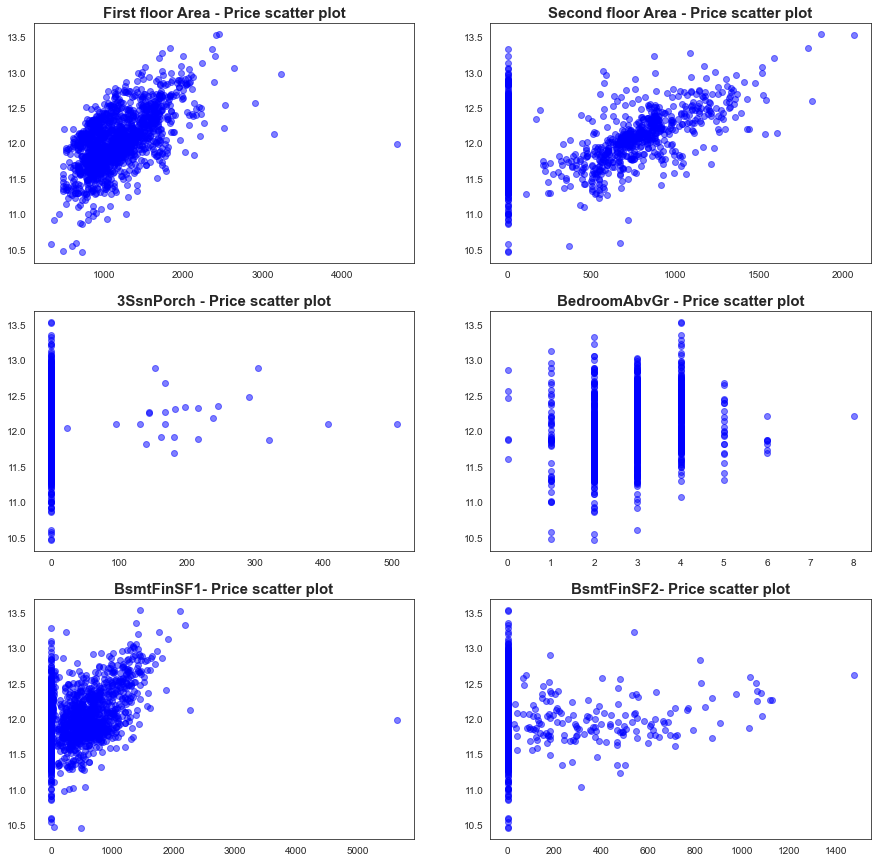

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=df['1stFlrSF'], y=df['SalePrice'], color=('blue'),alpha=0.5)
#plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax2 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=df['2ndFlrSF'], y=df['SalePrice'], color=('blue'),alpha=0.5)
plt.title('Second floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax3 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=df['3SsnPorch'], y=df['SalePrice'], color=('blue'),alpha=0.5)
#plt.axvline(x=310, color='r', linestyle='-')
plt.title('3SsnPorch - Price scatter plot', fontsize=15, weight='bold' )

ax4 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=df['BedroomAbvGr'], y=df['SalePrice'], color=('blue'),alpha=0.5)
#plt.axvline(x=7, color='r', linestyle='-')
plt.title('BedroomAbvGr - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=df['BsmtFinSF1'], y=df['SalePrice'], color=('blue'),alpha=0.5)
#plt.axvline(x=2250, color='r', linestyle='-')
plt.title('BsmtFinSF1- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=df['BsmtFinSF2'], y=df['SalePrice'], color=('blue'),alpha=0.5)
#plt.axvline(x=1200, color='r', linestyle='-')
plt.title('BsmtFinSF2- Price scatter plot', fontsize=15, weight='bold' )

In [ ]:
df.loc[df['1stFlrSF']>=2336,'1stFlrSF']=2336
#df.loc[df['2ndFlrSF']>=1760,'2ndFlrSF']=1760
df.loc[df['BedroomAbvGr']>=6,'BedroomAbvGr']=6
df.loc[df['BedroomAbvGr']<=1,'BedroomAbvGr']=1
df.loc[df['BsmtFinSF1']>=1832,'BsmtFinSF1']=1832
df.loc[df['BsmtFinSF2']>=1200,'BsmtFinSF2']=1200

Text(0.5, 1.0, 'FullBath- Price scatter plot')

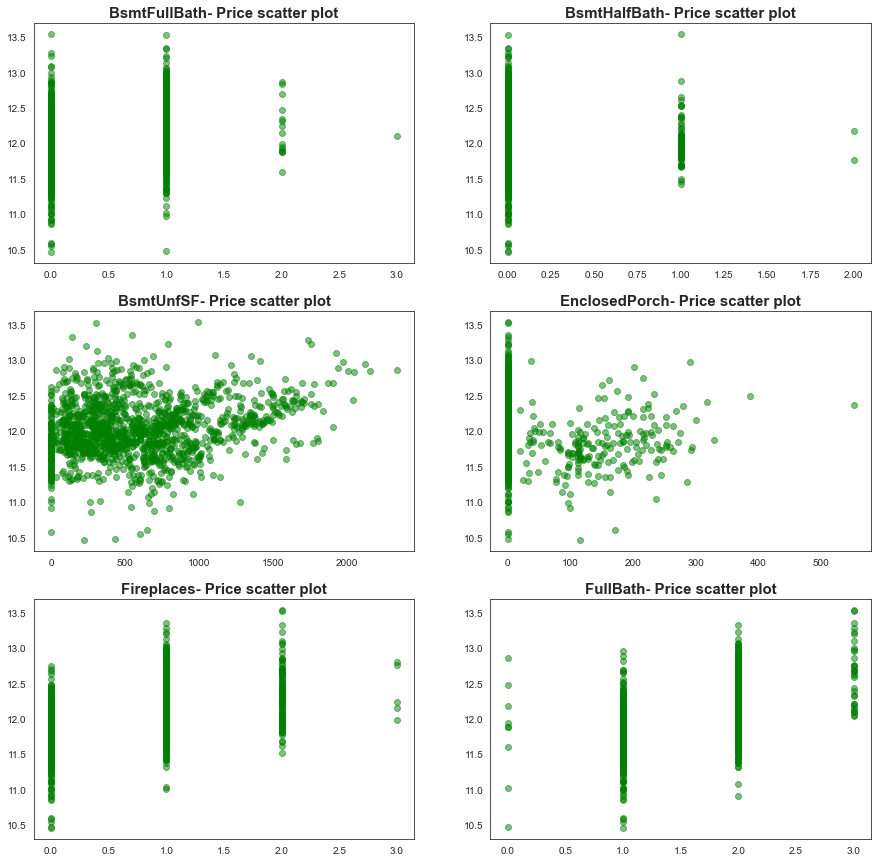

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=df['BsmtFullBath'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=1200, color='r', linestyle='-')
plt.title('BsmtFullBath- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=df['BsmtHalfBath'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=1200, color='r', linestyle='-')
plt.title('BsmtHalfBath- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=df['BsmtUnfSF'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=1200, color='r', linestyle='-')
plt.title('BsmtUnfSF- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=df['EnclosedPorch'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=400, color='r', linestyle='-')
plt.title('EnclosedPorch- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=df['Fireplaces'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=1200, color='r', linestyle='-')
plt.title('Fireplaces- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=df['FullBath'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=1200, color='r', linestyle='-')
plt.title('FullBath- Price scatter plot', fontsize=15, weight='bold')


In [ ]:
df.loc[df['EnclosedPorch']>=371,'EnclosedPorch']=371

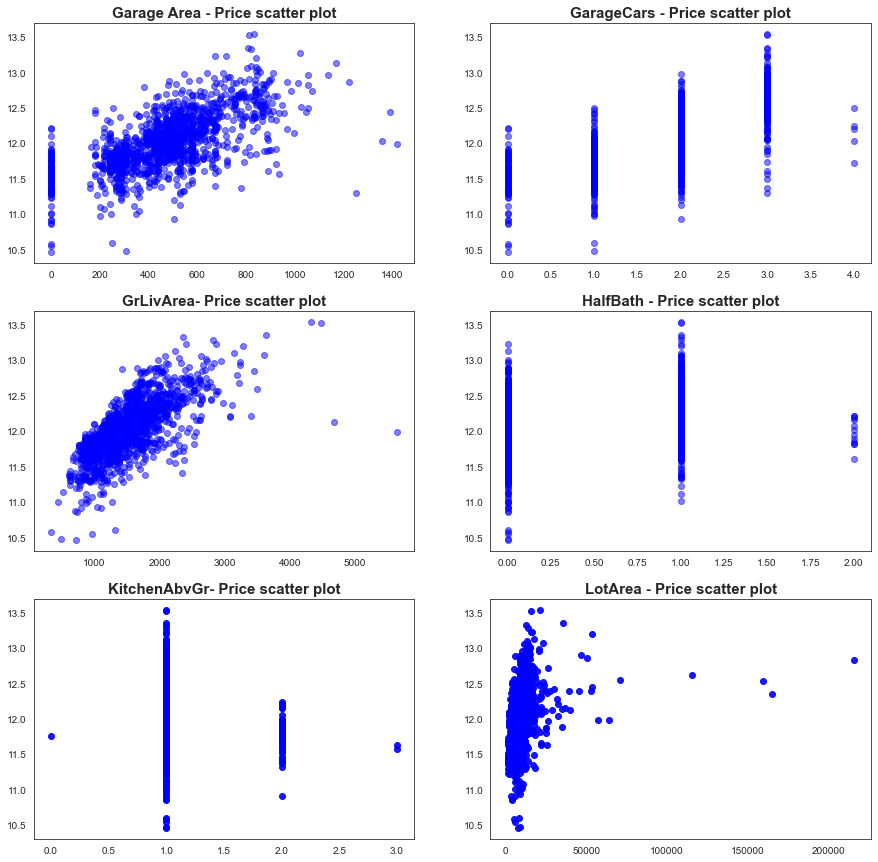

In [ ]:
#'GarageArea', 'GarageCars','GrLivArea', 'HalfBath','KitchenAbvGr', 'LotArea'
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=df['GarageArea'], y=df['SalePrice'], color=('blue'),alpha=0.5)
#plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=df['GarageCars'], y=df['SalePrice'], color=('blue'),alpha=0.5)
#plt.axvline(x=1230, color='r', linestyle='-')
plt.title('GarageCars - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'], color=('blue'), alpha=0.5)
#plt.axvline(x=4600, color='r', linestyle='-')
plt.title('GrLivArea- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=df['HalfBath'], y=df['SalePrice'], color=('blue'),alpha=0.5)
#plt.axvline(x=5900, color='r', linestyle='-')
plt.title('HalfBath - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=df['KitchenAbvGr'], y=df['SalePrice'], color=('blue'),alpha=0.9)
#plt.axvline(x=1500, color='r', linestyle='-')
plt.title('KitchenAbvGr- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=df['LotArea'], y=df['SalePrice'], color=('blue'),alpha=0.9)
#plt.axvline(x=13, color='r', linestyle='-')
plt.title('LotArea - Price scatter plot', fontsize=15, weight='bold' )
plt.show()

In [ ]:
df.loc[df['GarageArea']>=1220,'GarageArea']=960
df.loc[df['GrLivArea']>=3019,'GrLivArea']=3019

Text(0.5, 1.0, 'OverallCond- Price scatter plot')

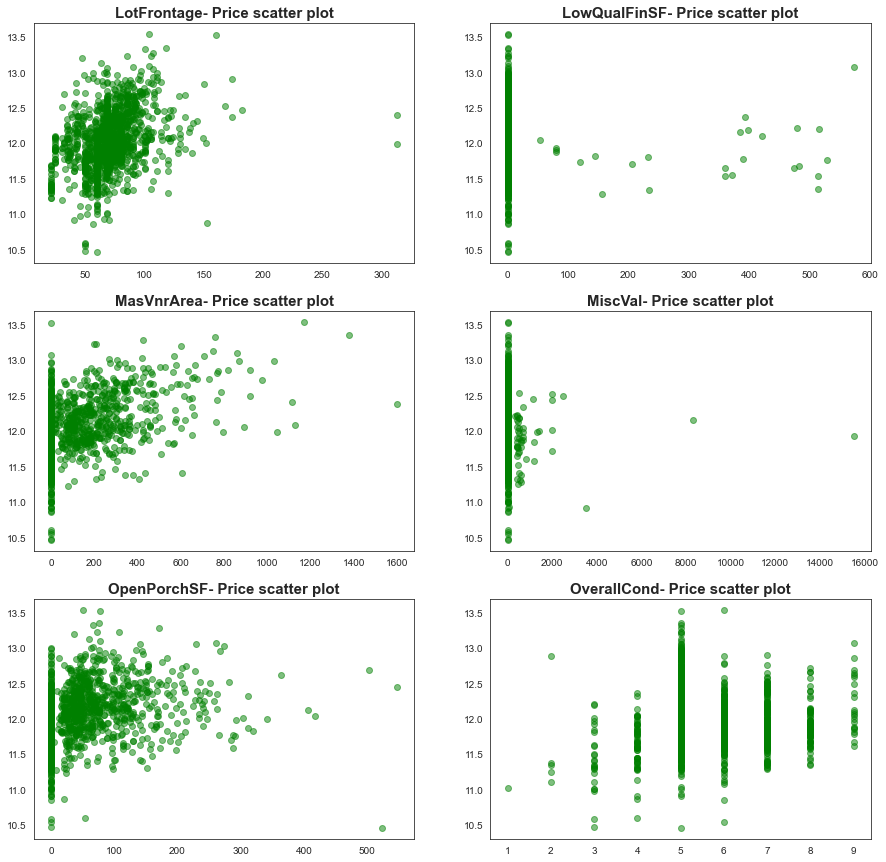

In [ ]:
#LotFrontage','LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=df['LotFrontage'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=200, color='r', linestyle='-')
plt.title('LotFrontage- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=df['LowQualFinSF'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=1200, color='r', linestyle='-')
plt.title('LowQualFinSF- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=df['MasVnrArea'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=1500, color='r', linestyle='-')
plt.title('MasVnrArea- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=df['MiscVal'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=4000, color='r', linestyle='-')
plt.title('MiscVal- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=df['OpenPorchSF'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=1200, color='r', linestyle='-')
plt.title('OpenPorchSF- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=df['OverallCond'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=1200, color='r', linestyle='-')
plt.title('OverallCond- Price scatter plot', fontsize=15, weight='bold')

In [ ]:
df.loc[df['LotFrontage']>=200,'LotFrontage']=134
df.loc[df['MasVnrArea']>=1400,'MasVnrArea']=660
df.loc[df['OpenPorchSF']>=450,'OpenPorchSF']=250
df.loc[df['MiscVal']>=3000,'MiscVal']=3000

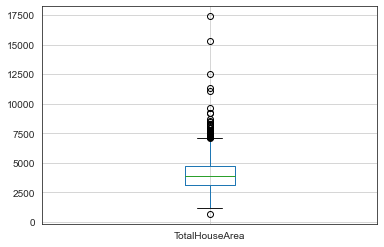

In [ ]:
figure=df.boxplot(column='TotalHouseArea')

<AxesSubplot:xlabel='TotalHouseArea'>

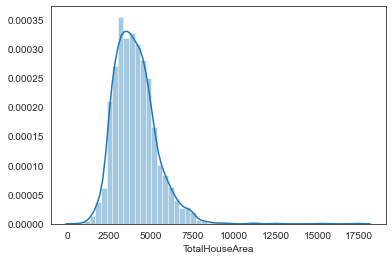

In [ ]:
#figure=df.boxplot(column='TotalHouseArea')
sns.distplot(df['TotalHouseArea'].dropna())

In [ ]:
df['TotalHouseArea'].describe()

count     2919.000000
mean      4048.242549
std       1269.221279
min        668.000000
25%       3153.500000
50%       3902.000000
75%       4740.000000
max      17394.000000
Name: TotalHouseArea, dtype: float64

In [ ]:
uppper_boundary=df['TotalHouseArea'].mean() + 3* df['TotalHouseArea'].std()
lower_boundary=df['TotalHouseArea'].mean() - 3* df['TotalHouseArea'].std()
print(lower_boundary), print(uppper_boundary),print(df['TotalHouseArea'].mean())

240.5787123074674
7855.90638532871
4048.2425488180884


(None, None, None)

In [ ]:
IQR=df['MasVnrArea'].quantile(0.75)-df['MasVnrArea'].quantile(0.25)
lower_bridge=df['MasVnrArea'].quantile(0.25)-(IQR*3)
upper_bridge=df['MasVnrArea'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-495.0
660.0


(None, None)

Text(0.5, 1.0, 'WoodDeckSF- Price scatter plot')

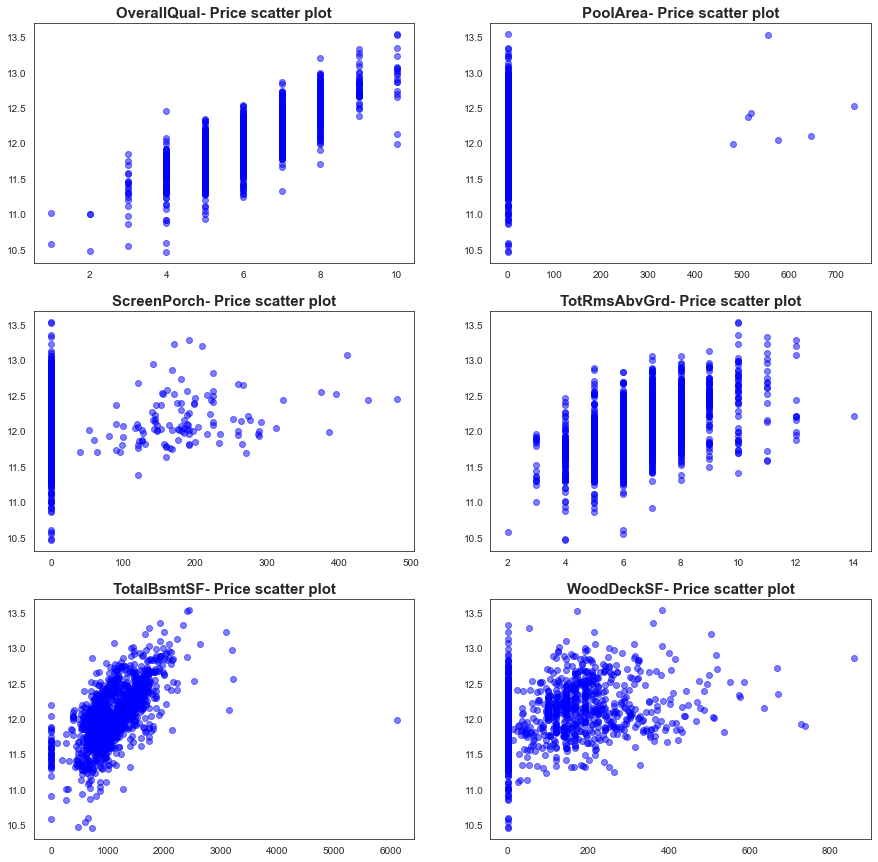

In [ ]:
#'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF'
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=df['OverallQual'], y=df['SalePrice'], color=('blue'),alpha=0.5)
#plt.axvline(x=200, color='r', linestyle='-')
plt.title('OverallQual- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=df['PoolArea'], y=df['SalePrice'], color=('blue'),alpha=0.5)
#plt.axvline(x=1200, color='r', linestyle='-')
plt.title('PoolArea- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=df['ScreenPorch'], y=df['SalePrice'], color=('blue'),alpha=0.5)
#plt.axvline(x=1500, color='r', linestyle='-')
plt.title('ScreenPorch- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=df['TotRmsAbvGrd'], y=df['SalePrice'], color=('blue'),alpha=0.5)
#plt.axvline(x=4000, color='r', linestyle='-')
plt.title('TotRmsAbvGrd- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=df['TotalBsmtSF'], y=df['SalePrice'], color=('blue'),alpha=0.5)
#plt.axvline(x=3500, color='r', linestyle='-')
plt.title('TotalBsmtSF- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=df['WoodDeckSF'], y=df['SalePrice'], color=('blue'),alpha=0.5)
#plt.axvline(x=1200, color='r', linestyle='-')
plt.title('WoodDeckSF- Price scatter plot', fontsize=15, weight='bold')

In [ ]:
df.loc[df['TotalBsmtSF']>=3500,'TotalBsmtSF']=3500

Text(0.5, 1.0, 'YrSoldGarageYrBltdiff- Price scatter plot')

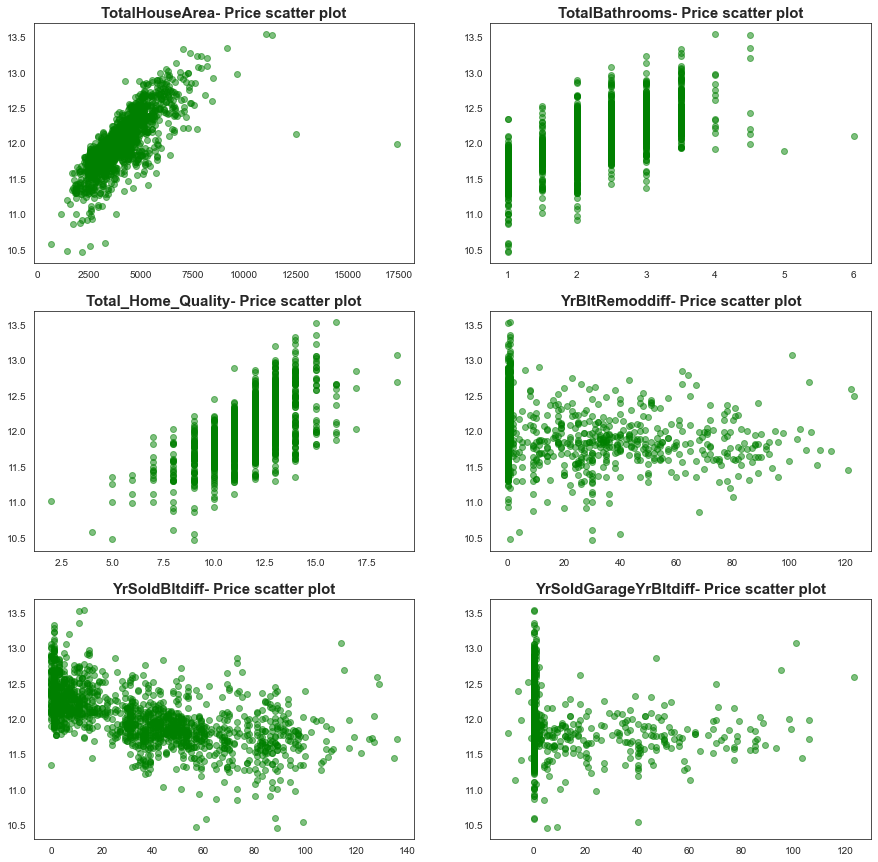

In [ ]:
#'TotalHouseArea', 'TotalBathrooms','Total_Home_Quality', 'YrBltRemoddiff', 'YrSoldBltdiff','YrSoldGarageYrBltdiff'
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=df['TotalHouseArea'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=12000, color='r', linestyle='-')
plt.title('TotalHouseArea- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=df['TotalBathrooms'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=1200, color='r', linestyle='-')
plt.title('TotalBathrooms- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=df['Total_Home_Quality'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Total_Home_Quality- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=df['YrBltRemoddiff'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=4000, color='r', linestyle='-')
plt.title('YrBltRemoddiff- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=df['YrSoldBltdiff'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=3500, color='r', linestyle='-')
plt.title('YrSoldBltdiff- Price scatter plot', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=df['YrSoldGarageYrBltdiff'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=1200, color='r', linestyle='-')
plt.title('YrSoldGarageYrBltdiff- Price scatter plot', fontsize=15, weight='bold')

In [ ]:
df.loc[df['TotalHouseArea']>=12300,'TotalHouseArea']=4048

Text(0.5, 1.0, 'Total_porch_sf- Price scatter plot')

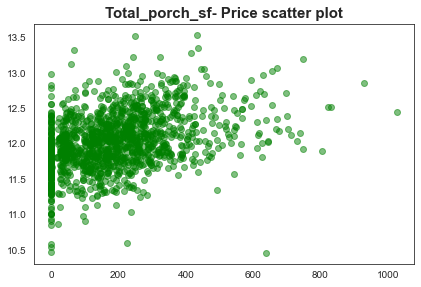

In [ ]:
#'Total_porch_sf'
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=df['Total_porch_sf'], y=df['SalePrice'], color=('green'),alpha=0.5)
#plt.axvline(x=12000, color='r', linestyle='-')
plt.title('Total_porch_sf- Price scatter plot', fontsize=15, weight='bold' )

# Fix skewed features

In [ ]:
numeric = [feature for feature in df.columns if df[feature].dtypes != 'O']
#'O' stands for object

print('Number of numerical variables: ', len(numeric))

# visualise the numerical variables
print(numeric)

Number of numerical variables:  52
['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'TotalHouseArea', 'TotalBathrooms', 'Total_Home_Quality', 'YrBltRemoddiff', 'YrSoldBltdiff', 'YrSoldGarageYrBltdiff', 'Total_porch_sf', 'Haspool', 'Has2ndfloor', 'Hasgarage', 'Hasbsmt', 'Hasfireplace', 'HasWoodDeck', 'HasOpenPorch', 'HasEnclosedPorch', 'Has3SsnPorch', 'HasScreenPorch']


In [ ]:
numeric_feat=['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1','BsmtFinSF2', 
              'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath',
              'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 
              'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 
              'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 
              'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', ]

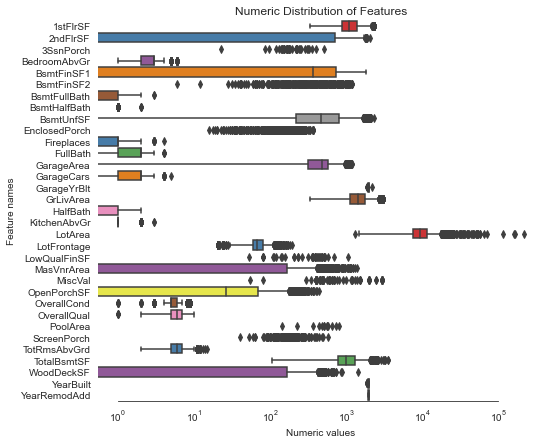

In [ ]:
#Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[numeric_feat] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [ ]:
# Find skewed numerical features
skew_features = df[numeric_feat].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 25 numerical features with Skew > 0.5 :


PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
MiscVal           9.524503
KitchenAbvGr      4.302254
BsmtFinSF2        4.016649
ScreenPorch       3.946694
BsmtHalfBath      3.931594
EnclosedPorch     2.901416
dtype: float64

We use the scipy function boxcox1p which computes the Box-Cox transformation. The goal is to find a simple transformation that lets us normalize data.

In [ ]:
# Normalize skewed features
for i in skew_index:
    df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))

C:\Users\Divyansh Mathur\anaconda3\envs\Tensorflow\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Divyansh Mathur\anaconda3\envs\Tensorflow\lib\site-packages\scipy\stats\stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


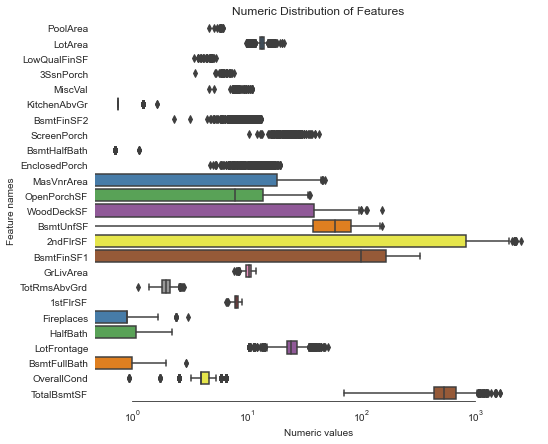

In [ ]:
# Let's make sure we handled all the skewed values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

All the features look fairly normally distributed now.

# Encoding the variables

In [ ]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [ ]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Haspool,Has2ndfloor,Hasgarage,Hasbsmt,Hasfireplace,HasWoodDeck,HasOpenPorch,HasEnclosedPorch,Has3SsnPorch,HasScreenPorch
0,7.795107,1019.540835,0.0,None,3,1Fam,TA,No,162.758018,0.0,...,0,1,1,1,0,1,0,1,1,1
1,8.312556,0.000000,0.0,None,3,1Fam,TA,Gd,206.733926,0.0,...,0,0,1,1,1,0,1,1,1,1
2,7.890577,1034.306520,0.0,None,3,1Fam,TA,Mn,123.688813,0.0,...,0,1,1,1,1,1,0,1,1,1
3,7.948450,899.200621,0.0,None,3,1Fam,Gd,No,67.984497,0.0,...,0,1,1,1,1,1,0,0,1,1
4,8.182063,1265.167836,0.0,None,4,1Fam,TA,Av,154.036361,0.0,...,0,1,1,1,1,0,0,1,1,1


In [ ]:
df.BsmtCond.unique()#ord

array(['TA', 'Gd', 'None', 'Fa', 'Po'], dtype=object)

In [ ]:
df['BsmtExposure']=df['BsmtExposure'].replace({'None': 'No'})
df.BsmtExposure.unique()#ord

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

In [ ]:
df['BsmtFinType1']=df['BsmtFinType1'].replace({'None': 'NA'})
df.BsmtFinType1.unique()#ord

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ'], dtype=object)

In [ ]:
df['BsmtFinType2']=df['BsmtFinType2'].replace({'None': 'NA'})
df.BsmtFinType2.unique()#ord

array(['Unf', 'BLQ', 'NA', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [ ]:
df['BsmtQual']=df['BsmtQual'].replace({'None': 'NA'})
df.BsmtQual.unique()#ord

array(['Gd', 'TA', 'Ex', 'NA', 'Fa'], dtype=object)

In [ ]:
df.Condition1.unique()#cat
df.Condition2.unique()#cat
df.Electrical.unique()#cat
df.CentralAir.unique()#cat
df.BldgType.unique()#cat
df.Alley.unique()#cat
df.Exterior1st.unique()#cat
df.Exterior2nd.unique()#cat
df.Foundation.unique()#cat
df.Functional.unique()#cat

df['GarageFinish']=df['GarageFinish'].replace({'None': 'NA'})
df.GarageFinish.unique()#cat
df['GarageType']=df['GarageType'].replace({'None': 'NA'})
df.GarageType.unique()#cat
df.Heating.unique()#cat
df.HouseStyle.unique()#cat
df.LandContour.unique()#cat
df.LotConfig.unique()#cat
df.LotShape.unique()#cat
df.MSSubClass.unique()#cat
df.MSZoning.unique()#cat
df.MasVnrType.unique()#cat
df['MiscFeature']=df['MiscFeature'].replace({'None': 'NA'})
df.MiscFeature.unique()#cat
df.Neighborhood.unique()#cat
df.PavedDrive.unique()#cat
df.RoofMatl.unique()#cat
#'RoofStyle','SaleCondition', 'SaleType'
df.RoofStyle.unique()#cat
df.SaleCondition.unique()#cat
df.SaleType.unique()#cat
df.Street.unique()
df.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [ ]:
df.ExterCond.unique()#ord

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [ ]:
df.ExterQual.unique()#ord

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
df['Fence']=df['Fence'].replace({'None': 'NA'})
df.Fence.unique()#ord

array(['NA', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [ ]:
df['FireplaceQu']=df['FireplaceQu'].replace({'None': 'NA'})
df.FireplaceQu.unique()#ord

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
df['GarageCond']=df['GarageCond'].replace({'None': 'NA'})
df.GarageCond.unique()#ord

array(['TA', 'Fa', 'NA', 'Gd', 'Po', 'Ex'], dtype=object)

In [ ]:
df['GarageQual']=df['GarageQual'].replace({'None': 'NA'})
df.GarageQual.unique()#ord

array(['TA', 'Fa', 'Gd', 'NA', 'Ex', 'Po'], dtype=object)

In [ ]:
df.GarageYrBlt.unique()#ord

array([2003. , 1976. , 2001. , 1998. , 2000. , 1993. , 2004. , 1973. ,
       1931. , 1939. , 1965. , 2005. , 1962. , 2006. , 1960. , 1991. ,
       1970. , 1967. , 1958. , 1930. , 2002. , 1968. , 2007. , 2008. ,
       1957. , 1920. , 1966. , 1959. , 1995. , 1954. , 1953. , 1955. ,
       1983. , 1977. , 1925. , 1997. , 1985. , 1963. , 1981. , 1964. ,
       1999. , 1935. , 1990. , 1945. , 1987. , 1989. , 1915. , 1956. ,
       1948. , 1974. , 2009. , 1950. , 1994. , 1961. , 1921. , 1900. ,
       1979. , 1951. , 1940. , 1969. , 1971. , 1936. , 1975. , 1923. ,
       1924. , 1984. , 1926. , 1986. , 1988. , 1916. , 1932. , 1972. ,
       1918. , 1980. , 1934. , 1996. , 1949. , 1910. , 1978. , 1982. ,
       1992. , 1941. , 1922. , 2010. , 1927. , 1947. , 1937. , 1942. ,
       1938. , 1952. , 1928. , 1942.5, 1946. , 1906. , 1914. , 1908. ,
       1929. , 1933. , 1917. , 1896. , 1966.5, 1895. , 2207. , 1943. ,
       1919. ])

In [ ]:
df.HeatingQC.unique()#ord

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [ ]:
df.KitchenQual.unique()#ord

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
df.LandSlope.unique()#ord

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [ ]:
df.MoSold.unique()#ord

array(['2', '5', '9', '12', '10', '8', '11', '4', '1', '7', '3', '6'],
      dtype=object)

In [ ]:
df.OverallQual.unique()#ord
df.OverallCond.unique()#ord

array([3.98963803, 5.99643532, 4.67707263, 5.34503805, 3.27873824,
       1.75988724, 2.53855208, 6.6334593 , 0.92625172])

In [ ]:
df['PoolQC']=df['PoolQC'].replace({'None': 'NA'})
df.PoolQC.unique()#ord

array(['NA', 'Ex', 'Fa', 'Gd'], dtype=object)

In [ ]:
df.YearBuilt.unique()#ord

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905, 1907, 1896, 1902, 1895, 1879, 1901], dtype=int64)

In [ ]:
df.YearRemodAdd.unique()#ord
df.YrSold.unique()#ord

array(['2008', '2007', '2006', '2009', '2010'], dtype=object)

In [ ]:
#Label Encoding the ordinal variables
label_features=['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                'BsmtQual','ExterCond','ExterQual','Fence','FireplaceQu',
               'GarageCond','GarageQual','HeatingQC','KitchenQual',
               'LandSlope','MoSold','OverallQual','OverallCond','PoolQC','YrSold', 
                'YearBuilt', 'YearRemodAdd','GarageYrBlt']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for feature in label_features:
    df[feature]=encoder.fit_transform(df[feature])

In [ ]:
df[label_features].head()

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,Fence,FireplaceQu,GarageCond,...,KitchenQual,LandSlope,MoSold,OverallQual,OverallCond,PoolQC,YrSold,YearBuilt,YearRemodAdd,GarageYrBlt
0,4,3,2,6,2,4,2,4,3,5,...,2,0,4,6,4,3,2,110,53,96
1,4,1,0,6,2,4,3,4,5,5,...,3,0,7,5,7,3,1,83,26,69
2,4,2,2,6,2,4,2,4,5,5,...,2,0,11,6,4,3,2,108,52,94
3,1,3,0,6,4,4,3,4,2,5,...,2,0,4,6,4,3,0,25,20,91
4,4,0,2,6,2,4,2,4,5,5,...,2,0,3,7,4,3,2,107,50,93


In [ ]:
df.shape

(2919, 98)

In [ ]:
# OneHotEncoding the ordinal variables
categorical_features=['Alley','BldgType', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'Exterior1st','Exterior2nd', 'Foundation','Functional',
       'GarageFinish', 'GarageType', 'Heating', 'HouseStyle','LandContour', 
       'LotConfig','LotShape', 'MSSubClass', 'MSZoning','MasVnrType', 'MiscFeature',
       'Neighborhood','PavedDrive', 'RoofMatl', 'RoofStyle','SaleCondition', 'SaleType',
       'Street','Utilities']


In [ ]:
df_cat=pd.get_dummies(df[categorical_features])
print("the shape of the original dataset",df[categorical_features].shape)
print("the shape of the encoded dataset",df_cat.shape)
print("We have ",df_cat.shape[1]- df[categorical_features].shape[1], 'new encoded features')

the shape of the original dataset (2919, 29)
the shape of the encoded dataset (2919, 205)
We have  176 new encoded features


In [ ]:
df_cat.columns

Index(['Alley_Grvl', 'Alley_None', 'Alley_Pave', 'BldgType_1Fam',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'CentralAir_N', 'CentralAir_Y',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'Street_Grvl', 'Street_Pave',
       'Utilities_AllPub', 'Utilities_NoSeWa'],
      dtype='object', length=205)

In [ ]:
data=df.join(df_cat)

In [ ]:
data.drop(labels=['Alley','BldgType', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'Exterior1st','Exterior2nd', 'Foundation','Functional',
       'GarageFinish', 'GarageType', 'Heating', 'HouseStyle','LandContour', 
       'LotConfig','LotShape', 'MSSubClass', 'MSZoning','MasVnrType', 'MiscFeature',
       'Neighborhood','PavedDrive', 'RoofMatl', 'RoofStyle','SaleCondition', 'SaleType',
       'Street','Utilities'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'Street_Grvl', 'Street_Pave',
       'Utilities_AllPub', 'Utilities_NoSeWa'],
      dtype='object', length=274)

In [ ]:
data.shape

(2919, 274)

In [ ]:
#data =data.loc[:,~data.columns.duplicated()]
#removing duplicate columns because if 2 columns values are the same then it can be assumed that they can be related. 

In [ ]:
train_df=data.loc[:1459,:]
train_df.Id

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [ ]:
train_df.SalePrice

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [ ]:
test_df=data.loc[1460:,:]
test_df.Id

1460    1461
1461    1462
1462    1463
1463    1464
1464    1465
        ... 
2914    2915
2915    2916
2916    2917
2917    2918
2918    2919
Name: Id, Length: 1459, dtype: int64

In [ ]:
test_df.SalePrice

1460   NaN
1461   NaN
1462   NaN
1463   NaN
1464   NaN
        ..
2914   NaN
2915   NaN
2916   NaN
2917   NaN
2918   NaN
Name: SalePrice, Length: 1459, dtype: float64

In [ ]:
train_df.drop(labels=['Id'], axis=1, inplace=True)
test_df.drop(labels=['Id', 'SalePrice'], axis=1, inplace=True)

C:\Users\Divyansh Mathur\anaconda3\envs\Tensorflow\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_df.shape

(1460, 273)

In [ ]:
test_df.shape

(1459, 272)

# Training the Model

In [ ]:
train_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,7.795107,1019.540835,0.0,3,4,3,162.758018,0.0,2,6,...,0,0,0,0,0,1,0,1,1,0
1,8.312556,0.000000,0.0,3,4,1,206.733926,0.0,0,6,...,0,0,0,0,0,1,0,1,1,0
2,7.890577,1034.306520,0.0,3,4,2,123.688813,0.0,2,6,...,0,0,0,0,0,1,0,1,1,0
3,7.948450,899.200621,0.0,3,1,3,67.984497,0.0,0,6,...,0,0,0,0,0,1,0,1,1,0
4,8.182063,1265.167836,0.0,4,4,0,154.036361,0.0,2,6,...,0,0,0,0,0,1,0,1,1,0


In [ ]:
X=train_df.copy()
X.drop(labels=['SalePrice'], axis=1, inplace=True)
y=train_df.SalePrice
test=test_df

Importing some useful libraries for model building

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

Splitting the dataset into the training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .2, random_state=0)

Robust Scaling to take care of the outliers

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test_df= scaler.transform(test)

# Linear Regression

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
MSEs=ms.cross_val_score(lreg,X , y, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSEs)
print(meanMSE)
print('RMSE = '+str(math.sqrt(-meanMSE)))

-0.017570442137258648
RMSE = 0.1325535444160534


# Ridge Regression

In [ ]:
#Ridge Regression
import sklearn.model_selection as GridSearchCV # to get more great Hypert pramater value
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(X_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=11 is: ",math.sqrt(-ridge_reg.best_score_))
ridge_pred=math.sqrt(-ridge_reg.best_score_)

The best value of Alpha is:  {'alpha': 19}
The best score achieved with Alpha=11 is:  0.11676674750619993


In [ ]:
ridge_mod=Ridge(alpha=19)
ridge_mod.fit(X_train,y_train)
y_pred_train=ridge_mod.predict(X_train)
y_pred_test=ridge_mod.predict(X_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_pred_test)))) 

Root Mean Square Error train = 0.09886330727100112
Root Mean Square Error test = 0.12920997563655384


# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}
lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(X_train,y_train)
print('The best value of Alpha is: ',lasso_reg.best_params_)

The best value of Alpha is:  {'alpha': 0.0009}


In [ ]:
lasso_mod=Lasso(alpha=0.0009)
lasso_mod.fit(X_train,y_train)
y_lasso_train=lasso_mod.predict(X_train)
y_lasso_test=lasso_mod.predict(X_test)

print('Root Mean Square Error train = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train))))
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, y_lasso_test))))

Root Mean Square Error train = 0.10267608450163945
Root Mean Square Error test = 0.1218943857321825


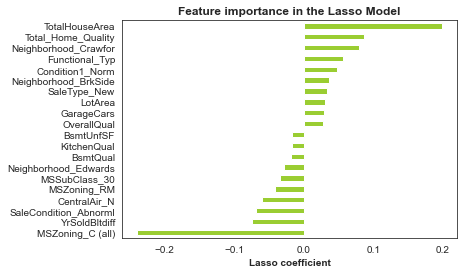

In [ ]:
coefs = pd.Series(lasso_mod.coef_, index = X.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

In [ ]:
print("Lasso kept ",sum(coefs != 0), "important features and dropped the other ", 
      sum(coefs == 0)," features")

Lasso kept  88 important features and dropped the other  184  features


# ElasticNetCV

In [ ]:
from sklearn.linear_model import ElasticNetCV

alphas = [10,1,0.1,0.01,0.001,0.002,0.003,0.004,0.005,0.00054255]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(X_train, y_train.ravel())
ela_pred=elasticmod.predict(X_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))
print(elastic_cv.alpha_)
print(elastic_cv.l1_ratio_)

Root Mean Square Error test = 0.12116538577570424
0.00054255
0.99


# XGB Regressor

In [ ]:
from xgboost.sklearn import XGBRegressor

#xg_reg = XGBRegressor()
#xgparam_grid= {'learning_rate' : [0.01],'n_estimators':[2000, 3460, 4000],
#                                     'max_depth':[3], 'min_child_weight':[3,5],
#                                     'colsample_bytree':[0.5,0.7],
#                                     'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],
#                                    'reg_lambda':[1,0.01,0.8,0.001,0.0001]}

#xg_grid=GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#xg_grid.fit(x_train,y_train)
#print(xg_grid.best_estimator_)
#print(xg_grid.best_score_)

In [ ]:
xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgmod=xgb.fit(X_train,y_train)
xg_pred=xgmod.predict(X_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, xg_pred))))

Root Mean Square Error test = 0.11677746353128866


# Voting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv), 
                            ('XGBRegressor', xgb)])
vote= vote_mod.fit(X_train, y_train.ravel())
vote_pred=vote.predict(X_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, vote_pred))))

Root Mean Square Error test = 0.11859752959504752


# Stacking Regressor

In [ ]:
! pip install mlxtend
from mlxtend.regressor import StackingRegressor


stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod, vote_mod], 
                           meta_regressor=xgb, use_features_in_secondary=True
                          )

stack_mod=stregr.fit(X_train, y_train.ravel())
stacking_pred=stack_mod.predict(X_test)

print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, stacking_pred))))

Root Mean Square Error test = 0.12429257730280067


Choosing the best out of the Lot

In [ ]:
final_test=(0.6*vote_pred+0.2*ela_pred+ 0.2*y_lasso_test)
print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, final_test))))

Root Mean Square Error test = 0.1194382192511904


In [ ]:
#VotingRegressor to predict the final Test
vote_test = vote_mod.predict(test_df)
final1=np.expm1(vote_test)

#ElasticNetCV to predict the final Test
ela_test = elastic_cv.predict(test_df)
final2=np.expm1(ela_test)

#LassoRegressor to predict the final Test
lasso_test = lasso_mod.predict(test_df)
final3=np.expm1(lasso_test)

In [ ]:
testing=pd.read_csv(r'C:\Users\Divyansh Mathur\Desktop\ML\Housing\test.csv.')

In [ ]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
final=(0.6*final1+0.2*final2+0.2*final3)

final_submission = pd.DataFrame({
        "Id": testing["Id"],
        "SalePrice": final
    })
final_submission.to_csv("final_submission.csv", index=False)
final_submission.head()

,Id,SalePrice
0,1461,119031.612839
1,1462,162384.696535
2,1463,181509.387150
3,1464,197319.819123
4,1465,186407.663719
